Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats

In [ ]:
# importing csvs

In [115]:
bikes_df = pd.read_csv('../data/finalCSVs/city_bikes.csv')
bikes_df['ll'] = bikes_df['latitude'] + bikes_df['longitude']
bikes_df.head()

latitude  longitude  total_bikes                                id  \
0  41.765862 -87.614787            2  0503ab6ec0734343264ef6f2e972c32b   
1  41.870959 -87.700259            8  3b5764e0f031bd56d4b7985250805270   
2  41.666395 -87.619933            1  4067cf8e05861b94b7f003d1c2955f07   
3  41.775144 -87.708129           15  a08a288f5a66216ca4bc4091dd34f94c   
4  41.942423 -87.747130            1  b7013ce71928ecee4dec9478a2d4fce6   

          ll  
0 -45.848925  
1 -45.829300  
2 -45.953538  
3 -45.932985  
4 -45.804707

In [3]:
bikes_df.shape[0]

567

In [ ]:
# combining yelp & foursquare data first

In [10]:
fsq_df = pd.read_csv('../data/finalCSVs/fsq_df_final.csv')
fsq_df.head()

name  popularity  price  rating  distance   latitude  \
0               Inn        9.67    2.0     NaN      36.0  41.765862   
1   Roy's Soul Food        8.93    1.0     NaN      45.0  41.765862   
2   Sammy Submarine         NaN    NaN     NaN      69.0  41.765862   
3   Sunny Submarine        9.97    1.0     NaN      70.0  41.765862   
4  Gold Post Lounge         NaN    NaN     NaN     180.0  41.765862   

   longitude                      ll     poi_cat  
0 -87.614787  41.765862%2C-87.614787  restaurant  
1 -87.614787  41.765862%2C-87.614787  restaurant  
2 -87.614787  41.765862%2C-87.614787  restaurant  
3 -87.614787  41.765862%2C-87.614787  restaurant  
4 -87.614787  41.765862%2C-87.614787  restaurant

In [5]:
# checking number of rows for foursquare data
fsq_df.shape[0] 

11907

In [7]:
yelp_df = pd.read_csv('../data/finalCSVs/yelp_df_final.csv')
yelp_df.head()

name  rating  price    distance   latitude  \
0                 Roy's Soul Food    70.0      1   45.728666  41.765862   
1                       Sunny Sub    70.0      1   57.372699  41.765862   
2                 Uncle Don Ray's    30.0      1  417.066004  41.765862   
3                   Southtown Sub    80.0      1  513.689635  41.765862   
4  Baba's Famous Steak & Lemonade    50.0      1  607.730035  41.765862   

   longitude                      ll     poi_cat  
0 -87.614787  41.765862%2C-87.614787  restaurant  
1 -87.614787  41.765862%2C-87.614787  restaurant  
2 -87.614787  41.765862%2C-87.614787  restaurant  
3 -87.614787  41.765862%2C-87.614787  restaurant  
4 -87.614787  41.765862%2C-87.614787  restaurant

In [8]:
# checking number of rows for yelp data
yelp_df.shape[0]

6613

In [11]:
# merging foursquare & yelp dataframes
food_df = pd.concat([fsq_df, yelp_df])

In [12]:
# shape should be 18,520 11,907 + 6,613
food_df.shape[0]

18520

In [13]:
food_df['ll'] = food_df['latitude'] + food_df['longitude']

In [14]:
food_df = food_df[['name','popularity','price','rating','distance','poi_cat','latitude','longitude','ll']]

In [81]:
food_df

name  popularity  price  rating  \
0                                    Inn        9.67    2.0     NaN   
1                        Roy's Soul Food        8.93    1.0     NaN   
2                        Sammy Submarine         NaN    NaN     NaN   
3                        Sunny Submarine        9.97    1.0     NaN   
4                       Gold Post Lounge         NaN    NaN     NaN   
...                                  ...         ...    ...     ...   
6608               Barbara's Bestsellers         NaN    2.0    70.0   
6609        Kurt Gippert Bookseller ABAA         NaN    2.0   100.0   
6610               Sandmeyer's Bookstore         NaN    2.0    80.0   
6611            Curbside Books & Records         NaN    2.0    60.0   
6612  Wicker Park Secret Agent Supply Co         NaN    2.0    90.0   

         distance     poi_cat   latitude  longitude         ll  
0       36.000000  restaurant  41.765862 -87.614787 -45.848925  
1       45.000000  restaurant  41.765862 -87.614787 -45.848925  
2       69.000000  restaurant  41.765862 -87.614787 -45.848925  
3       70.000000  restaurant  41.765862 -87.614787 -45.848925  
4      180.000000  restaurant  41.765862 -87.614787 -45.848925  
...           ...         ...        ...        ...        ...  
6608   707.843830       books  41.889375 -87.627077 -45.737701  
6609   709.178438       books  41.939398 -87.711561 -45.772163  
6610   972.590369       books  41.871467 -87.640949 -45.769483  
6611  1278.560000       books  41.871467 -87.640949 -45.769483  
6612  4390.938019       books  41.871467 -87.640949 -45.769483  

[18520 rows x 9 columns]

In [15]:
food_df.set_index('ll')

name  popularity  price  rating  \
ll                                                                          
-45.848925                                 Inn        9.67    2.0     NaN   
-45.848925                     Roy's Soul Food        8.93    1.0     NaN   
-45.848925                     Sammy Submarine         NaN    NaN     NaN   
-45.848925                     Sunny Submarine        9.97    1.0     NaN   
-45.848925                    Gold Post Lounge         NaN    NaN     NaN   
...                                        ...         ...    ...     ...   
-45.737701               Barbara's Bestsellers         NaN    2.0    70.0   
-45.772163        Kurt Gippert Bookseller ABAA         NaN    2.0   100.0   
-45.769483               Sandmeyer's Bookstore         NaN    2.0    80.0   
-45.769483            Curbside Books & Records         NaN    2.0    60.0   
-45.769483  Wicker Park Secret Agent Supply Co         NaN    2.0    90.0   

               distance     poi_cat   latitude  longitude  
ll                                                         
-45.848925    36.000000  restaurant  41.765862 -87.614787  
-45.848925    45.000000  restaurant  41.765862 -87.614787  
-45.848925    69.000000  restaurant  41.765862 -87.614787  
-45.848925    70.000000  restaurant  41.765862 -87.614787  
-45.848925   180.000000  restaurant  41.765862 -87.614787  
...                 ...         ...        ...        ...  
-45.737701   707.843830       books  41.889375 -87.627077  
-45.772163   709.178438       books  41.939398 -87.711561  
-45.769483   972.590369       books  41.871467 -87.640949  
-45.769483  1278.560000       books  41.871467 -87.640949  
-45.769483  4390.938019       books  41.871467 -87.640949  

[18520 rows x 8 columns]

In [16]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18520 entries, 0 to 6612
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        18520 non-null  object 
 1   popularity  9113 non-null   float64
 2   price       11714 non-null  float64
 3   rating      10790 non-null  float64
 4   distance    18520 non-null  float64
 5   poi_cat     18520 non-null  object 
 6   latitude    18520 non-null  float64
 7   longitude   18520 non-null  float64
 8   ll          18520 non-null  float64
dtypes: float64(7), object(2)
memory usage: 1.4+ MB


In [17]:
# joining food dataframe with bike data
final_df = food_df.merge(bikes_df, how='left', on='ll')

In [145]:
# making sure dataframes merged in the correct spot
final_df

name  popularity  price  rating  \
0                                     Inn        9.67    2.0     NaN   
1                         Roy's Soul Food        8.93    1.0     NaN   
2                         Sammy Submarine         NaN    NaN     NaN   
3                         Sunny Submarine        9.97    1.0     NaN   
4                        Gold Post Lounge         NaN    NaN     NaN   
...                                   ...         ...    ...     ...   
16126     Pauline Books and Media Chicago         NaN    2.0   100.0   
16127               Barbara's Bestsellers         NaN    2.0    70.0   
16128        Kurt Gippert Bookseller ABAA         NaN    2.0   100.0   
16129            Curbside Books & Records         NaN    2.0    60.0   
16130  Wicker Park Secret Agent Supply Co         NaN    2.0    90.0   

          distance   latitude  longitude                         stationId  \
0        36.000000  41.765862 -87.614787  0503ab6ec0734343264ef6f2e972c32b   
1        45.000000  41.765862 -87.614787  0503ab6ec0734343264ef6f2e972c32b   
2        69.000000  41.765862 -87.614787  0503ab6ec0734343264ef6f2e972c32b   
3        70.000000  41.765862 -87.614787  0503ab6ec0734343264ef6f2e972c32b   
4       180.000000  41.765862 -87.614787  0503ab6ec0734343264ef6f2e972c32b   
...            ...        ...        ...                               ...   
16126   494.343620  41.889375 -87.627077  766f998ceaa433774940a1cb0674445f   
16127   707.843830  41.889375 -87.627077  766f998ceaa433774940a1cb0674445f   
16128   709.178438  41.939398 -87.711561  8331b895b5ffe28350476baa3eb663c0   
16129  1278.560000  41.871467 -87.640949  ee6928bd2a7172a0189305ebc12505c3   
16130  4390.938019  41.871467 -87.640949  ee6928bd2a7172a0189305ebc12505c3   

       totalBikes      poiCat  
0               2  restaurant  
1               2  restaurant  
2               2  restaurant  
3               2  restaurant  
4               2  restaurant  
...           ...         ...  
16126          30       books  
16127          30       books  
16128          12       books  
16129          14       books  
16130          14       books  

[16131 rows x 10 columns]

In [19]:
# adjusting column names and dropping irrelevant/duplicate columns
final_df['latitude'] = final_df['latitude_x']
final_df['longitude'] = final_df['longitude_x']
final_df['stationId'] = final_df['id']
final_df['totalBikes'] = final_df['total_bikes']
final_df['poiCat'] = final_df['poi_cat']
final_df = final_df.drop(columns=['latitude_x', 'longitude_x','latitude_y', 'longitude_y','id','total_bikes', 'poi_cat', 'll'] )

In [20]:
final_df['poiCat'].replace(
    ['ice_cream','icecream'],
    'iceCream',
    inplace=True
    )

In [21]:
final_df['poiCat'].replace(
    ['museum'],
    'museums',
    inplace=True
    )

In [22]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18520 entries, 0 to 18519
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        18520 non-null  object 
 1   popularity  9113 non-null   float64
 2   price       11714 non-null  float64
 3   rating      10790 non-null  float64
 4   distance    18520 non-null  float64
 5   latitude    18520 non-null  float64
 6   longitude   18520 non-null  float64
 7   stationId   18520 non-null  object 
 8   totalBikes  18520 non-null  int64  
 9   poiCat      18520 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 1.6+ MB


In [ ]:
# looking for any duplicate rows now that all databases are joined

In [23]:
final_df[final_df.duplicated(['name','stationId'])]

name  popularity  price  rating    distance  \
11907                 Roy's Soul Food         NaN    1.0    70.0   45.728666   
11911  Baba's Famous Steak & Lemonade         NaN    1.0    50.0  607.730035   
11912          Front Yard Jerk Grille         NaN    2.0    70.0  609.942120   
11917                          Subway         NaN    1.0    70.0  622.418028   
11918                      J & J Fish         NaN    1.0    70.0  639.590574   
...                               ...         ...    ...     ...         ...   
18508              Armadillo's Pillow         NaN    1.0    90.0  617.009872   
18509           Sandmeyer's Bookstore         NaN    2.0    80.0  890.295400   
18511              Armadillo's Pillow         NaN    1.0    90.0  463.937796   
18512                  Heirloom Books         NaN    1.0   100.0  932.967698   
18517           Sandmeyer's Bookstore         NaN    2.0    80.0  972.590369   

        latitude  longitude                         stationId  totalBikes  \
11907  41.765862 -87.614787  0503ab6ec0734343264ef6f2e972c32b           2   
11911  41.765862 -87.614787  0503ab6ec0734343264ef6f2e972c32b           2   
11912  41.765862 -87.614787  0503ab6ec0734343264ef6f2e972c32b           2   
11917  41.870959 -87.700259  3b5764e0f031bd56d4b7985250805270           8   
11918  41.870959 -87.700259  3b5764e0f031bd56d4b7985250805270           8   
...          ...        ...                               ...         ...   
18508  42.010587 -87.662412  1a1597b75ce539ca3852e86fa40fa9e4          13   
18509  41.870257 -87.639474  24584d0f8ede430a7b0ad33526a2b6df          12   
18511  42.001044 -87.661198  eaec65f163adf9e1aa9c5142640fac7c          22   
18512  42.001044 -87.661198  eaec65f163adf9e1aa9c5142640fac7c          22   
18517  41.871467 -87.640949  ee6928bd2a7172a0189305ebc12505c3          14   

           poiCat  
11907  restaurant  
11911  restaurant  
11912  restaurant  
11917  restaurant  
11918  restaurant  
...           ...  
18508       books  
18509       books  
18511       books  
18512       books  
18517       books  

[2389 rows x 10 columns]

In [24]:
final_df = final_df.drop_duplicates(subset=['name','stationId'])

In [146]:
#after dropping duplicates, final dataframe should be 16,131 rows
final_df.shape[0]

16131

In [158]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16131 entries, 0 to 16130
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        16131 non-null  object 
 1   popularity  9113 non-null   float64
 2   price       9325 non-null   float64
 3   rating      8401 non-null   float64
 4   distance    16131 non-null  float64
 5   latitude    16131 non-null  float64
 6   longitude   16131 non-null  float64
 7   stationId   16131 non-null  object 
 8   totalBikes  16131 non-null  int64  
 9   poiCat      16131 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 1.2+ MB


In [171]:
final_df.describe()

popularity        price      rating      distance      latitude  \
count  9113.000000  9325.000000  8401.00000  16131.000000  16131.000000   
mean      8.615765     1.451367    72.45316    565.016378     41.864397   
std       2.102011     0.612258    15.10402   1225.047550      0.086283   
min       1.000000     1.000000    20.00000      0.000000     41.648501   
25%       8.850000     1.000000    66.00000    264.000000     41.799336   
50%       9.450000     1.000000    75.00000    478.000000     41.884069   
75%       9.770000     2.000000    82.00000    735.206454     41.921540   
max      10.000000     4.000000   100.00000  37282.422753     42.064313   

          longitude    totalBikes  
count  16131.000000  16131.000000  
mean     -87.665159     11.143946  
std        0.051056      8.678660  
min      -87.833817      0.000000  
25%      -87.699481      2.000000  
50%      -87.662412     11.000000  
75%      -87.631697     15.000000  
max      -87.533531     53.000000

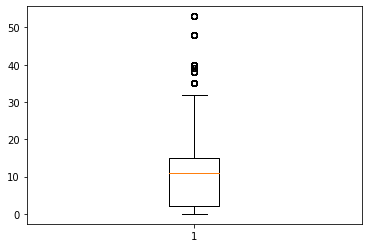

In [172]:
# max number of bikes looks quite high
fig, ax = plt.subplots()
ax.boxplot(final_df['totalBikes'])
plt.show()

In [173]:
# finding the z score for total bikes
stats.zscore(final_df['totalBikes'])

# turning absolute
np.abs(stats.zscore(final_df['totalBikes']))

# viewing the outliers
final_df['totalBikes'][(np.abs(stats.zscore(final_df['totalBikes']))>3)]

1676     40
1677     40
1678     40
1679     40
1680     40
         ..
16035    48
16036    48
16037    48
16077    53
16078    53
Name: totalBikes, Length: 235, dtype: int64

In [175]:
# I don't want to delete these rows completely, as they may still have useful information
# so I am replacing them with the mean
bike_mean = final_df['totalBikes'].mean()
final_df["totalBikes"] = np.where(final_df["totalBikes"] > 35, bike_mean, final_df["totalBikes"])

In [176]:
final_df.describe()

popularity        price      rating      distance      latitude  \
count  9113.000000  9325.000000  8401.00000  16131.000000  16131.000000   
mean      8.615765     1.451367    72.45316    565.016378     41.864397   
std       2.102011     0.612258    15.10402   1225.047550      0.086283   
min       1.000000     1.000000    20.00000      0.000000     41.648501   
25%       8.850000     1.000000    66.00000    264.000000     41.799336   
50%       9.450000     1.000000    75.00000    478.000000     41.884069   
75%       9.770000     2.000000    82.00000    735.206454     41.921540   
max      10.000000     4.000000   100.00000  37282.422753     42.064313   

          longitude    totalBikes  
count  16131.000000  16131.000000  
mean     -87.665159     10.678311  
std        0.051056      7.732038  
min      -87.833817      0.000000  
25%      -87.699481      2.000000  
50%      -87.662412     11.000000  
75%      -87.631697     15.000000  
max      -87.533531     35.000000

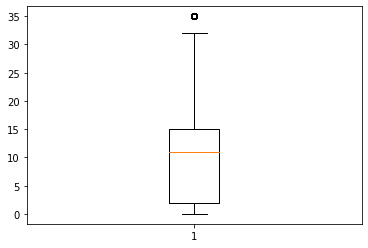

In [177]:
# this looks much nicer
fig, ax = plt.subplots()
ax.boxplot(final_df['totalBikes'])
plt.show()

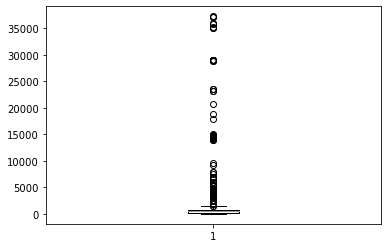

In [180]:
# distance also quite high
fig, ax = plt.subplots()
ax.boxplot(final_df['distance'])
plt.show()

In [181]:
# finding the z score for total bikes
stats.zscore(final_df['distance'])

# turning absolute
np.abs(stats.zscore(final_df['distance']))

# viewing the outliers
final_df['distance'][(np.abs(stats.zscore(final_df['distance']))>3)]

6111     7457.000000
6843     7962.000000
8237     6981.000000
8291     7832.000000
8892     6035.000000
            ...     
16010    4466.493426
16025    4637.040639
16099    4792.262659
16124    4569.875731
16130    4390.938019
Name: distance, Length: 65, dtype: float64

In [182]:
# using same technique as above
# replacing all values above our max radius
distance_mean = final_df['distance'].mean()
final_df["distance"] = np.where(final_df["distance"] > 1000, bike_mean, final_df["distance"])

In [185]:
final_df.describe()

popularity        price      rating      distance      latitude  \
count  9113.000000  9325.000000  8401.00000  16131.000000  16131.000000   
mean      8.615765     1.451367    72.45316    464.040991     41.864397   
std       2.102011     0.612258    15.10402    279.088454      0.086283   
min       1.000000     1.000000    20.00000      0.000000     41.648501   
25%       8.850000     1.000000    66.00000    232.000000     41.799336   
50%       9.450000     1.000000    75.00000    448.000000     41.884069   
75%       9.770000     2.000000    82.00000    696.000000     41.921540   
max      10.000000     4.000000   100.00000   1000.000000     42.064313   

          longitude    totalBikes  
count  16131.000000  16131.000000  
mean     -87.665159     10.678311  
std        0.051056      7.732038  
min      -87.833817      0.000000  
25%      -87.699481      2.000000  
50%      -87.662412     11.000000  
75%      -87.631697     15.000000  
max      -87.533531     35.000000

In [226]:
# saving df as csv
final_df.to_csv('final_df.csv', index=False)

On average:
- Cheaper POIs are rated
- POIs are rated at about 72/100
- Nearby bike stations have 11 bikes available

In [227]:
# looking at the correlation between variables
# price and rating still show a small positive correlation
# total bikes also appears to have a slight positive correlation to price and rating
final_df.corr()

popularity     price    rating  distance  latitude  longitude  \
popularity    1.000000  0.117160  0.179574 -0.088727 -0.022736   0.022702   
price         0.117160  1.000000  0.219444 -0.149356  0.096145   0.087003   
rating        0.179574  0.219444  1.000000 -0.088252  0.216233   0.009232   
distance     -0.088727 -0.149356 -0.088252  1.000000 -0.032659  -0.036967   
latitude     -0.022736  0.096145  0.216233 -0.032659  1.000000  -0.434697   
longitude     0.022702  0.087003  0.009232 -0.036967 -0.434697   1.000000   
totalBikes    0.002379  0.165029  0.200294 -0.068729  0.350033   0.247168   

            totalBikes  
popularity    0.002379  
price         0.165029  
rating        0.200294  
distance     -0.068729  
latitude      0.350033  
longitude     0.247168  
totalBikes    1.000000

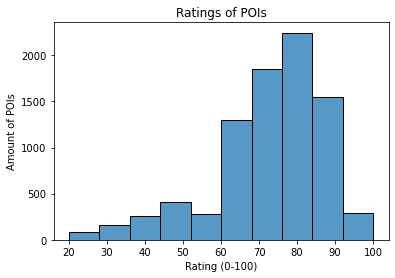

In [228]:
# Looking at Ratings
sns.histplot(final_df['rating'], bins = 10)
plt.xlabel('Rating (0-100)')
plt.ylabel('Amount of POIs')
plt.title('Ratings of POIs')
plt.show()

In [229]:
# definitely a right skew, with most ratings falling between 60 and 90

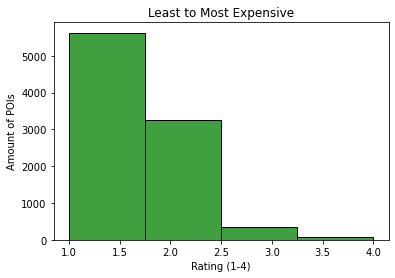

In [230]:
# Looking at prices
sns.histplot(final_df['price'], bins = 4, color = 'green')
plt.xlabel('Rating (1-4)')
plt.ylabel('Amount of POIs')
plt.title('Least to Most Expensive')
plt.show()

In [263]:
# looking at price vs ratings
price_rating_fig = px.histogram(
    final_df,
    x='price', 
    y='rating', 
    histfunc='avg',
    nbins=8,
    color_discrete_sequence=['#79e5cb'],
    labels=dict(price="price from least to most expensive", 
                rating="rating out of 100"))
price_rating_fig.update(layout_yaxis_range = [50,100])
price_rating_fig.update_layout(
    title={
        'text': 'Price vs Avg Rating',
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)
price_rating_fig.update_layout({'plot_bgcolor': '#dfe7ed',},bargap=0.1)
price_rating_fig.show()

In [191]:
# looking at price vs ratings
price_count_fig = px.histogram(
    final_df,
    x='price', 
    histfunc='count',
    nbins=8,
    color_discrete_sequence=['#2d8c9e'],
    labels=dict(price="price from least to most expensive"))
price_count_fig.update(layout_yaxis_range = [0,6000])
price_count_fig.update_layout(
    title={
        'text': '# of POIs per Price Point',
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)
price_count_fig.update_layout({'plot_bgcolor': '#dfe7ed',},bargap=0.1)
price_count_fig.show()

In [212]:
# looking at rating vs # of bikes
ratingVSbikes_fig = px.histogram(
    final_df,
    x='totalBikes', 
    y='rating', 
    histfunc='avg',
    nbins=8,
    color_discrete_sequence=['#F7CAC9'],
    labels=dict(rating="rating out of 100", 
                totalBikes="total # of bikes"))
ratingVSbikes_fig.update(layout_xaxis_range = [0,38])
ratingVSbikes_fig.update(layout_yaxis_range = [0,80])
ratingVSbikes_fig.update_layout(
    title={
        'text': 'Rating vs # of Bikes',
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)
ratingVSbikes_fig.update_layout({'plot_bgcolor': '#dfe7ed',},bargap=0.1)
ratingVSbikes_fig.show()

In [88]:
# the above data actually appears as though it might be normally distributed

In [259]:
# looking at price vs # of bikes
priceVSbikes_fig = px.histogram(
    final_df,
    x='price', 
    y='totalBikes', 
    histfunc='avg',
    color_discrete_sequence=['#79e5cb'],
    labels=dict(price="price from least to most expensive", 
                totalBikes="total # of bikes"))
priceVSbikes_fig.update_layout(
    title={
        'text': 'Price vs # of Bikes',
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)
priceVSbikes_fig.update_layout({'plot_bgcolor': '#dfe7ed',},bargap=0.1)
priceVSbikes_fig.show()

In [96]:
# above also looks fairly normally distributed

In [219]:
# is there a correlation between # of total bikes and nearby POIs?
bikes_per_poi_fig = px.histogram(
    final_df,
    y='totalBikes', 
    x='poiCat', 
    histfunc='avg',
    #nbins=8,
    color='poiCat',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    labels=dict(poiCat="Points of Interest", 
                totalBikes="# of bikes per station"))
#bikes_per_poi_fig.update(layout_xaxis_range = [0,50])
#bikes_per_poi_fig.update(layout_yaxis_range = [0,3])
bikes_per_poi_fig.update_layout(
    title={
        'text': 'Avg # of Bikes Per POI Cat',
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)
bikes_per_poi_fig.update_layout({'plot_bgcolor': '#dfe7ed',},bargap=0.1)
bikes_per_poi_fig.show()

In [89]:
# it seems as though museums and bookstores tend to be near stations with more bikes available

In [220]:
# making a matrix of all data
fig = px.scatter_matrix(final_df,
                        dimensions=['price', 'rating', 'totalBikes'],
                        color="poiCat",
                       color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(
    title={
        'text': 'All of my Data is Discrete but Colours are Beautiful',
        'y':.95,
        'x': .5,
        'xanchor': 'center',
        'yanchor': 'top'},
)
fig.show()

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

![count of prices per poi](../images/finalPriceCount.png)
![poi price vs avg rating](../images/finalPoiPriceAvgRating.png)


Originally, since the data showed so many establishments with cheaper price points, I assumed that they would be rated higher on average, just due to sheer numbers. (See `# of POIs per Price Point`).

After examining the data closer, however, I saw that while there *was* a correlation between ratings and prices, but it swung the other direction. Despite having a numbers advantage, the lower priced establishments still tended to rate poorly in comparison to their more expensive counterpoints.

(Another interesting note found through visualization, is that bike share stations near museums tend to hold more bikes)

![avg bikes per poi](../images/bikesPerPOI.png)

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [232]:
# sqlite imports
import sqlite3 as sqlite
from sqlalchemy import create_engine
from sqlite3 import Error

In [244]:
# connecting to sqlite and creating database
connect = sqlite.connect("../data/bikesVsYelpVsFSQ.sqlite")

In [245]:
# exporting dataframe to database
final_df.to_sql("final_df",connect, if_exists="replace", index=False)

16131

In [329]:
connect.close()

In [296]:
# function to return whether or not the connection was successful
def create_connection(path):
    con = None
    try:
        con = sqlite.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"the error '{e}' pccirred")
    return con

In [333]:
con = create_connection('../data/bikesVsYelpVsFSQ.sqlite')

Connection to SQLite DB successful


Look at the data before and after the join to validate your data.

In [265]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16131 entries, 0 to 16130
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        16131 non-null  object 
 1   popularity  9113 non-null   float64
 2   price       9325 non-null   float64
 3   rating      8401 non-null   float64
 4   distance    16131 non-null  float64
 5   latitude    16131 non-null  float64
 6   longitude   16131 non-null  float64
 7   stationId   16131 non-null  object 
 8   totalBikes  16131 non-null  float64
 9   poiCat      16131 non-null  object 
dtypes: float64(7), object(3)
memory usage: 1.2+ MB


In [266]:
final_df.shape[0]

16131

In [267]:
sql = 'SELECT * FROM final_df'
df = pd.read_sql_query(sql, con)
df.head()

name  popularity  price  rating  distance   latitude  \
0               Inn        9.67    2.0     NaN      36.0  41.765862   
1   Roy's Soul Food        8.93    1.0     NaN      45.0  41.765862   
2   Sammy Submarine         NaN    NaN     NaN      69.0  41.765862   
3   Sunny Submarine        9.97    1.0     NaN      70.0  41.765862   
4  Gold Post Lounge         NaN    NaN     NaN     180.0  41.765862   

   longitude                         stationId  totalBikes      poiCat  
0 -87.614787  0503ab6ec0734343264ef6f2e972c32b         2.0  restaurant  
1 -87.614787  0503ab6ec0734343264ef6f2e972c32b         2.0  restaurant  
2 -87.614787  0503ab6ec0734343264ef6f2e972c32b         2.0  restaurant  
3 -87.614787  0503ab6ec0734343264ef6f2e972c32b         2.0  restaurant  
4 -87.614787  0503ab6ec0734343264ef6f2e972c32b         2.0  restaurant

In [268]:
df.shape[0]

16131

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16131 entries, 0 to 16130
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        16131 non-null  object 
 1   popularity  9113 non-null   float64
 2   price       9325 non-null   float64
 3   rating      8401 non-null   float64
 4   distance    16131 non-null  float64
 5   latitude    16131 non-null  float64
 6   longitude   16131 non-null  float64
 7   stationId   16131 non-null  object 
 8   totalBikes  16131 non-null  float64
 9   poiCat      16131 non-null  object 
dtypes: float64(7), object(3)
memory usage: 1.2+ MB


In [48]:
# join appears to have been successful!

In [282]:
# looking at avg price, rating, and total bikes per POI Category

In [346]:
sql = '''SELECT poiCat, round(avg(price)) as avgPrice, round(avg(rating)) as avgRating,
round(avg(totalBikes)) as avgTotalBikes
FROM final_df
WHERE rating !='NaN'
GROUP BY poiCat
ORDER BY rating desc'''
df = pd.read_sql_query(sql, con)
df.head()

poiCat  avgPrice  avgRating  avgTotalBikes
0       books       2.0       81.0           16.0
1       parks       1.0       76.0           12.0
2     museums       1.0       80.0           18.0
3    iceCream       1.0       75.0           14.0
4  restaurant       2.0       71.0           10.0

In [283]:
con.close()

*My tables were all joined previously, but I've created a new database below just to demonstrate SQL ability as per the rubric*

In [287]:
bikes_example = pd.read_csv('../data/finalCSVs/bikes_df_ex.csv')
bikes_example.head()

latitude  longitude                         stationId  totalBikes  \
0  41.765862 -87.614787  0503ab6ec0734343264ef6f2e972c32b         2.0   
1  41.765862 -87.614787  0503ab6ec0734343264ef6f2e972c32b         2.0   
2  41.765862 -87.614787  0503ab6ec0734343264ef6f2e972c32b         2.0   
3  41.765862 -87.614787  0503ab6ec0734343264ef6f2e972c32b         2.0   
4  41.765862 -87.614787  0503ab6ec0734343264ef6f2e972c32b         2.0   

          ll  
0 -45.848925  
1 -45.848925  
2 -45.848925  
3 -45.848925  
4 -45.848925

In [288]:
food_example = pd.read_csv('../data/finalCSVs/food_df_ex.csv')
food_example.head()

name  popularity  price  rating  distance   latitude  \
0               Inn        9.67    2.0     NaN      36.0  41.765862   
1   Roy's Soul Food        8.93    1.0     NaN      45.0  41.765862   
2   Sammy Submarine         NaN    NaN     NaN      69.0  41.765862   
3   Sunny Submarine        9.97    1.0     NaN      70.0  41.765862   
4  Gold Post Lounge         NaN    NaN     NaN     180.0  41.765862   

   longitude         ll      poiCat  
0 -87.614787 -45.848925  restaurant  
1 -87.614787 -45.848925  restaurant  
2 -87.614787 -45.848925  restaurant  
3 -87.614787 -45.848925  restaurant  
4 -87.614787 -45.848925  restaurant

In [290]:
print(bikes_example.shape[0])
print(food_example.shape[0])

16131
16131


In [327]:
connect = sqlite.connect("../data/bikesVsYelpVsFSQ.sqlite")

In [292]:
food_example.to_sql("food_example",connect, if_exists="replace", index=False)

16131

In [293]:
bikes_example.to_sql("bikes_example",connect, if_exists="replace", index=False)

16131

In [298]:
sql = 'SELECT * FROM bikes_example'
df = pd.read_sql_query(sql, con)
df.head()

latitude  longitude                         stationId  totalBikes  \
0  41.765862 -87.614787  0503ab6ec0734343264ef6f2e972c32b         2.0   
1  41.765862 -87.614787  0503ab6ec0734343264ef6f2e972c32b         2.0   
2  41.765862 -87.614787  0503ab6ec0734343264ef6f2e972c32b         2.0   
3  41.765862 -87.614787  0503ab6ec0734343264ef6f2e972c32b         2.0   
4  41.765862 -87.614787  0503ab6ec0734343264ef6f2e972c32b         2.0   

          ll  
0 -45.848925  
1 -45.848925  
2 -45.848925  
3 -45.848925  
4 -45.848925

In [299]:
sql = 'SELECT * FROM food_example'
df = pd.read_sql_query(sql, con)
df.head()

name  popularity  price  rating  distance   latitude  \
0               Inn        9.67    2.0     NaN      36.0  41.765862   
1   Roy's Soul Food        8.93    1.0     NaN      45.0  41.765862   
2   Sammy Submarine         NaN    NaN     NaN      69.0  41.765862   
3   Sunny Submarine        9.97    1.0     NaN      70.0  41.765862   
4  Gold Post Lounge         NaN    NaN     NaN     180.0  41.765862   

   longitude         ll      poiCat  
0 -87.614787 -45.848925  restaurant  
1 -87.614787 -45.848925  restaurant  
2 -87.614787 -45.848925  restaurant  
3 -87.614787 -45.848925  restaurant  
4 -87.614787 -45.848925  restaurant

In [345]:
# looking at avg price, rating, and total bikes per POI Category
sql = '''SELECT f.poiCat, round(avg(f.price)) as avgPrice, round(avg(f.rating)) as avgRating,
round(avg(b.totalBikes)) as avgTotalBikes
FROM food_example f
JOIN bikes_example b ON f.ll = b.ll
WHERE f.rating !='NaN'
GROUP BY f.poiCat
ORDER BY f.rating desc;
'''
df = pd.read_sql_query(sql, con)
df.head()

poiCat  avgPrice  avgRating  avgTotalBikes
0       books       2.0       81.0           17.0
1       parks       1.0       76.0           13.0
2     museums       1.0       80.0           19.0
3    iceCream       1.0       75.0           16.0
4  restaurant       2.0       73.0           12.0

In [332]:
con.close()